#Grupo 25 - Entregable AyVD
#Parte 1 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
#df.columns

Para este problema, consideramos como relevantes las columnas `tools_programming_languages` y `salary_monthly_NETO`.

In [ ]:
# Consideramos solo estas dos columnas como relevantes para este problema
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
#df.tools_programming_languages.unique()

# Resolución del ejercicio 1:

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Realizamos los siguientes pasos para responder esta pregunta:

Primero, eliminaremos del dataset filas que contengan valores no deseados de la columna sueldo (salary_monthly_NETO). Aquí usamos como criterio quedarnos con la subpoblación de sueldos que sean mayores a \$25k y menores a \$500k, por considerar esta subpoblación más realista.

Segundo, seleccionaremos una subpoblación de lenguajes de programación, utilizando como criterio los lenguajes que cuenten con más de 1000 usuari@s en la presente encuesta.

Tercero, a cada lenguaje de programación elegido le calcularemos su distribución de sueldos y su mediana y media. 

Cuarto, analizaremos la probabilidad de ganar más de cierto monto dado que se trabaja con algunos lenguajes en particular.


# 1°) Eliminación de valores extremos de salary_monthly_NETO y construcción de subpoblación de la misma.

Utilizando el criterio de considerar outliers aquellos datos mayores a maxq = Q3+1.5*IQR, eliminamos filas de la columna 'salary_monthly_NETO'. Pero esto nos condujo a eliminar demasiados datos. Por lo que tomamos como criterio analizar una subpoblación de sueldos menores que 500k para el presente análisis. Además, tomaremos en esta subpoblacion de sueldos los que sean mayores a 25k, por considerar estas cifras más acordes a la pregunta que buscamos responder.

In [ ]:
salary_col='salary_monthly_NETO'

In [ ]:
#considero que es mas relevante colocar estos valores cuando realizamos la primera comparacion con maxq
#df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

In [ ]:
q3 = df['salary_monthly_NETO'].quantile(75/100) #(97 / 100) #q3=106000.00
q1 = df['salary_monthly_NETO'].quantile(25/100) #(97 / 100) #q1=51480.00
iqr = q3 - q1
maxq= q3+1.5*iqr

q99 = df['salary_monthly_NETO'].quantile(99 / 100)

print('El Q3+1.5*IQR es: ',maxq)
print('El percentil-99 es: ',q99)

El Q3+1.5*IQR es:  187780.0
El percentil-99 es:  491800.0000000029


Los posibles puntos superiores de corte para aplicar al dataset son:
*   Q3+1.5*IQR = 187780
*   Percentil-99 = 491800

Consideramos en primer lugar Q3+1.5*IQR, que lo podemos visualizar en el siguiente gráfico boxplot en conjunto con los datos que eventualmente descartaremos.

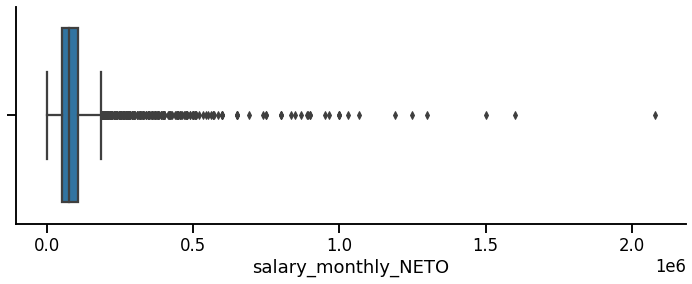

In [ ]:
#visualizamos maxq y los puntos a tirar:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

Eliminamos del dataset los valores que consideramos outliers tomando como puntos de corte los valores 25000 de mínimo y Q3+1.5*IQR de máximo. Luego comparamos las siguientes características entre el archivo original y el editado:
*   Media
*   Mediana
*   Conteo de datos
*   Desvío estandar
*   Cuartiles
*   Mínimo y máximo

Dichas comparaciones las realizamos por medio del método `describe()` que calcula los principales estadísticos de la variable.

In [ ]:
limite_inferior=25000
limite_superior= maxq
filtered_df_primer_caso = df[(limite_inferior< df[salary_col]) & (df[salary_col] < limite_superior)]
filtered_df_primer_caso[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count      5150.00
mean      80940.05
std       33792.81
min       25400.00
25%       54000.00
50%       77000.00
75%      100000.00
max      187000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

Ahora tomamos el segundo caso, donde nuestros puntos de corte serán 25000 para el mínimo y el percentil-99 = 492000 para el máximo.
Luego realizamos la comparación entre el dataset original y el resultante de este nuevo corte mediante las siguientes características:
*   Distribución
*   Media
*   Mediana
*   Conteo de datos
*   Desvío estandar
*   Cuartiles
*   Mínimo y máximo

Dichas comparaciones las realizamos por medio del método `describe()` que calcula los principales estadísticos de la variable y con el gráfico `histplot`.

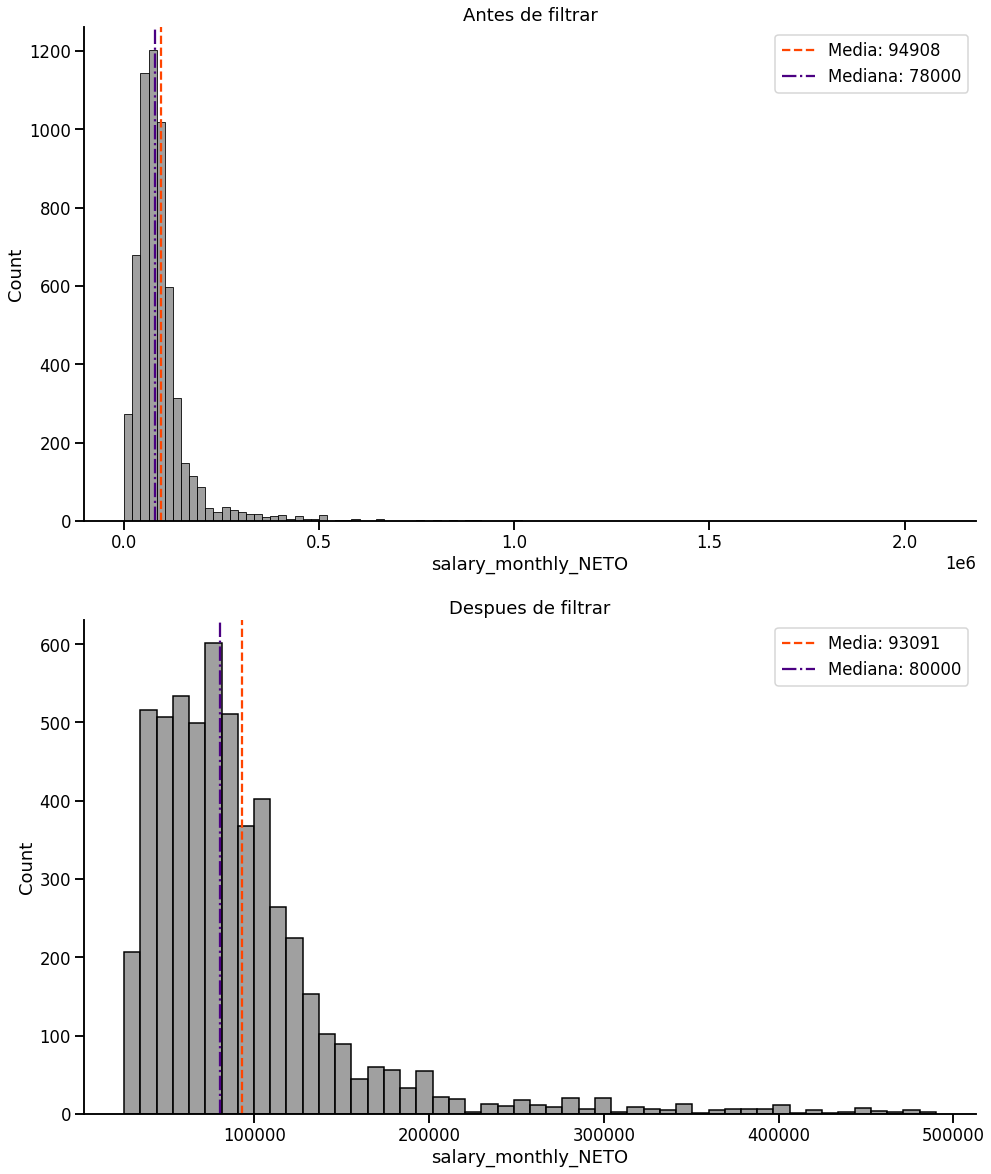

In [ ]:
# construccion del dataset filtrado por salario: filtered_df
# y lo comparamos con el original
fig, axes = plt.subplots(nrows=2, figsize=(16, 20))
axes[0].set_title('Antes de filtrar')
axes[1].set_title('Despues de filtrar')
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
#seaborn.histplot(df[salary_col], bins=np.logspace(3,7,40), ax=axes[0], color='gray')
#axes[0].set_xscale("log")
#axes[0].set_yscale("log")
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(df[salary_col].mean())))
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(df[salary_col].median())))

limite_inferior=25000
limite_superior=500000 #q97 #maxq
filtered_df = df[(limite_inferior< df[salary_col]) & (df[salary_col] < limite_superior)]
seaborn.histplot(filtered_df[salary_col], bins=50, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(filtered_df[salary_col].mean())))
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(filtered_df[salary_col].median())))

axes[0].legend()
axes[1].legend()
seaborn.despine()

In [ ]:
#Comparamos las metricas del dataset original
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#con las del nuevo dataset:
filtered_df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count      5484.00
mean      93091.00
std       61282.90
min       25400.00
25%       55414.75
50%       80000.00
75%      107931.00
max      490000.00
Name: salary_monthly_NETO, dtype: object

En el primer caso observamos que la mediana se modificó apenas en un 1%, mientras que la media un 14%, y la distancia entre media y mediana se redujo notablemente. Sin embargo, descartamos 5883 - 5150 = 733 filas, lo que corresponde a un 12% de los datos totales, que consideramos un número elevado.

Es por ello que consideramos pertinente seleccionar el segundo caso para poder trabajar, es decir, consideramos más adecuado quedarnos con la subpoblación de sueldos entre 25k, que nos parece un salario mínimo razonable, y 500k, que corresponde al cuantil 99. Este análisis quedará así condicional a una subpoblación. 


# 2°) Seleccionamos los lenguajes de programacion más usados por les encuestades.

Para ello haremos un conteo de frecuencias de los lenguajes de programación, y utilizaremos como criterio quedarnos con aquellos lenguajes con más de 1000 usuaries. 




La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [ ]:
filtered_df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
#Aquí se reemplazó df por filtered_df

# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df.loc[:, 'cured_programming_languages'] = filtered_df\
    .tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = filtered_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
#Rankeamos los diferentes lenguajes por frecuencia y limitamos por un mínimo de usuaries
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
#language_count[:12]
min_usuaries = 200
language_count[language_count['frequency'] > min_usuaries][:50]

,language,frequency
0,javascript,2249
1,sql,1957
2,html,1658
3,python,1340
4,java,1331
5,css,1103
6,bash/shell,921
7,php,788
8,.net,744
9,typescript,697


### Filtrado de lenguajes relevantes

Filtramos de nuestro dataset original sólo aquellos lenguajes que contienen un mínimo de 200 usuaries, ya que lo consideramos un número suficiente para realizar un análisis estadístico. 

Por otro lado, filtramos la categoria `ninguno` de `programming_language` ya que el análisis se basa en programadores. 

In [ ]:
# Filtramos los lenguajes con menos del minimo de usuaries definido anteriormente:
interesting_languages = language_count['language'][language_count['frequency'] > min_usuaries ]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

# Filtramos la categoria Ninguno de programming_language:
filtered_df_lang.drop(df_lang.loc[df_lang['programming_language']=='ninguno'].index, inplace=True)

filtered_df_lang[:5]

###--- no utilizado:
# Filtramos los lenguajes con menos de 1000 usuaries:
#interesting_languages = ["javascript","html","sql","python", "java", "css"] 
#filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

# Tambien podemos excluir manualmente categorias que sepamos no son exclusivamente lenguajes sino herramientas que todos usan
# herramientas = ['sql', 'bash/shell', 'html']
# interesting_languages = language_count['language'][(~language_count.language.isin(herramientas)) & (language_count['frequency'] > min_usuaries)]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
#df_lang[df_lang.programming_language.isin(["python"])].describe()

¿Los lenguajes que mayor salario tienen son representativos según la cantidad de encuestas respondidas? 

Graficamos los 40 lenguajes con mayor salario neto promedio, y los comparamos con la cantidad de encuestas respondidas por lenguaje.

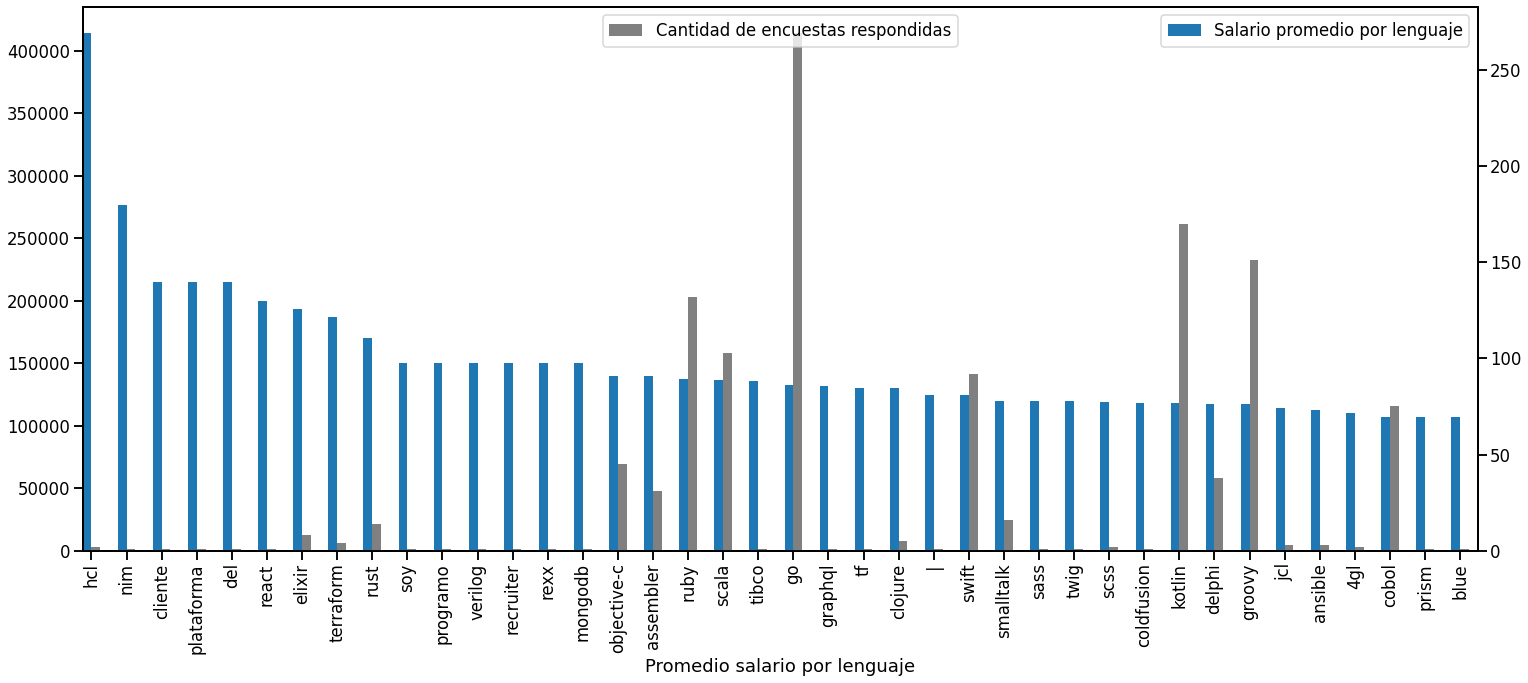

In [ ]:
d = df_lang
width = 0.5
n = 40
language_salary = d.groupby("programming_language")["salary_monthly_NETO"].mean().sort_values(ascending = False)
language_count = d.groupby("programming_language")["programming_language"].count()
fig, ax = plt.subplots(figsize = [25,10])
language_salary[:n].plot(kind = "bar", ax = ax, width = -width/2, align = "edge", label = "Salario promedio por lenguaje") # language_count.index
ax2 = plt.twinx()
language_count[language_salary[:n].index].plot(kind = "bar", color = "gray", ax = ax2, width = width/2, align = "edge", label = "Cantidad de encuestas respondidas")
ax.set_xlabel("Promedio salario por lenguaje")
ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper center')
plt.show()

Se puede ver que en general los lenguajes con mayor sueldo promedio tienen pocas respuestas y esto no lo consideramos representativo. Entonces el primer criterio a tener en cuenta para elegir una subpoblación es la cantidad de usuaries. 

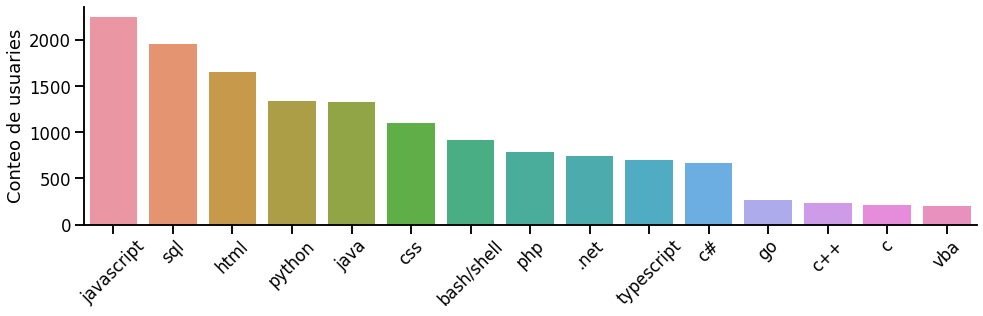

In [ ]:
count_by_progr_lang = filtered_df_lang.programming_language.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.barplot(x=count_by_progr_lang.index, y=count_by_progr_lang.values)
plt.xticks(rotation=45)
plt.ylabel("Conteo de usuaries")
seaborn.despine()

# 3°) Métricas y gráficas para comparar los lenguajes elegidos.

Para cada lenguaje de programación calculamos media, mediana,  boxplots, y distribuciones, para luego compararlos entre sí.

In [ ]:
p=(filtered_df_lang.groupby('programming_language').mean().salary_monthly_NETO).sort_values(ascending=False)
print('Las medias de cada lenguaje analizado son\n', p)

Las medias de cada lenguaje analizado son
 programming_language
go            132670.036171
python        106015.911524
c             105757.618241
typescript    105653.887446
bash/shell    102763.138393
java          100067.334872
c++            99818.328193
javascript     97540.742245
.net           94176.208535
c#             93948.333189
php            93133.049949
sql            91788.534614
html           91685.634150
css            90256.665113
vba            82735.982206
Name: salary_monthly_NETO, dtype: float64


In [ ]:
#medianas:
p=(filtered_df_lang.groupby('programming_language').median().salary_monthly_NETO).sort_values(ascending=False)
print('Las medianas de cada lenguaje analizado son\n', p)

Las medianas de cada lenguaje analizado son
 programming_language
go            110000.0
bash/shell     90000.0
python         90000.0
java           89742.0
typescript     87000.0
c              85000.0
javascript     80564.0
.net           80000.0
c++            80000.0
sql            80000.0
c#             78000.0
php            78000.0
html           75600.0
css            75000.0
vba            74880.0
Name: salary_monthly_NETO, dtype: float64


Vemos que tanto para las medias y como para las medianas los 6 lenguajes con mayores estadísticos son go, bash/shell, python, java, typescript y c, siendo go el lenguaje que encabeza ambas listas, y variando de posiciones según el estadístico los otros 5 lenguajes. 

Vemos, por ejemplo, que typescript tiene mayor media y menor mediana que bash/shell, y esto se debe a que typescript tiene más valores extremos que bash/shell.

(0.0, 250000.0)

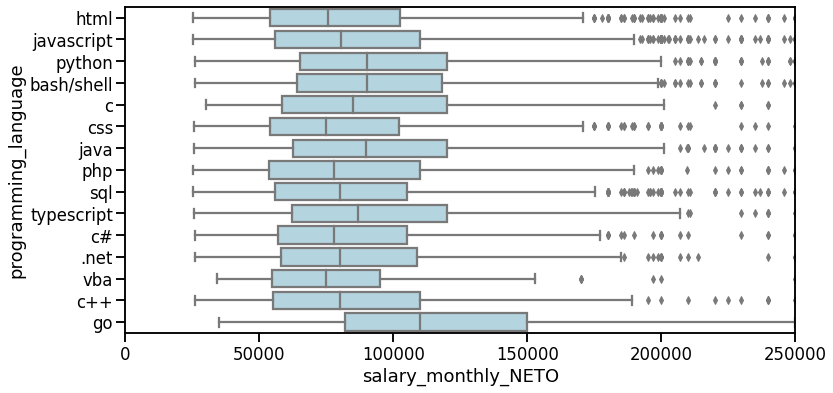

In [ ]:
#boxplots
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='lightblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,250000])

In [ ]:
#veamos las distribuciones de cada lenguaje, para ver cómo se comporta la muestra completa
#distribuciones de los lenguajes analizados:
#plt.figure(figsize=(12, 6))
#seaborn.histplot(data=filtered_df_lang.reset_index(), x='salary_monthly_NETO', hue='programming_language', kde=True)
#plt.ticklabel_format(style='plain', axis='x')
#(si no reseteabamos los indices, no andaba el hist, porq se le hace lio con los indices repetidos)
#filtered_df_lang

Veamos las distribuciones de los 6 lenguajes con mayor media y mediana:

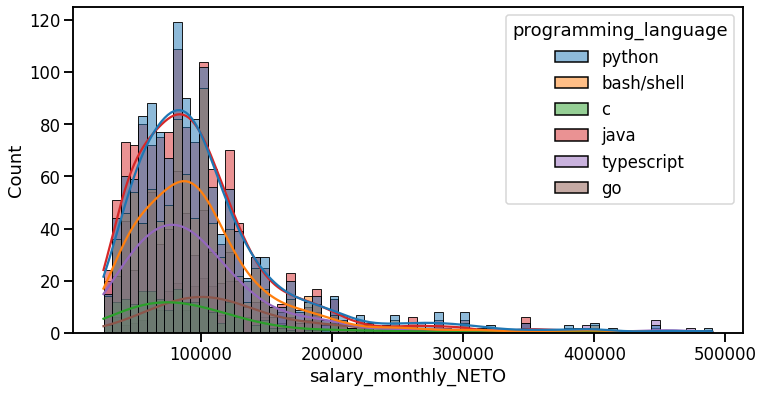

In [ ]:
#Comparamos los lenguajes con medias más altas: 'Java' y 'Python'.
interesting_languages = ["go", "c", "typescript", "bash/shell","java","python"] #"python", "java", "go", "c", "typescript", "bash/shell"
filtered_df_lang_2 = df_lang[df_lang.programming_language.isin(interesting_languages)]
#distribuciones:
plt.figure(figsize=(12, 6))
seaborn.histplot(data=filtered_df_lang_2.reset_index(), x='salary_monthly_NETO', hue='programming_language', kde=True)
plt.ticklabel_format(style='plain', axis='x')

Para tener una mejor representación de la comparación de las 6 distribuciones, las mostramos por separado y normalizadas.

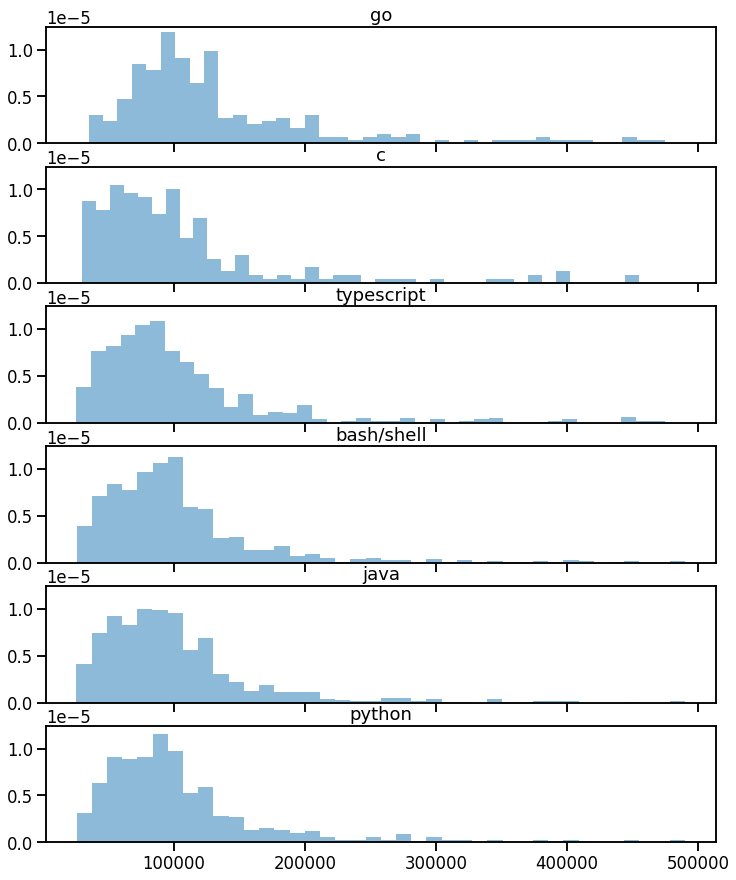

In [ ]:
interesting_languages =  ["go", "c", "typescript", "bash/shell","java","python"]

fig,ax = plt.subplots(len(interesting_languages), 1, figsize=(12, 15),sharex = True, sharey = True)
for idx, lang in enumerate(interesting_languages):
  filtered_df_lang_3 = df_lang[df_lang.programming_language == lang]
  ax[idx].hist(filtered_df_lang_3.salary_monthly_NETO, density = True, alpha = 0.5, label = lang, bins = 40)
  ax[idx].set_title(lang)
plt.ticklabel_format(style='plain', axis='x')
#plt.legend()
plt.show()

Vemos que las distribuciones difieren entre sí, algunas crecen de golpe (c, typescript), y otras decaen lento (c, go).

Para visualizar mejor la comparación, graficamos sólo el lenguaje con mayor y menor media, es decir, go y java, respectivamente.

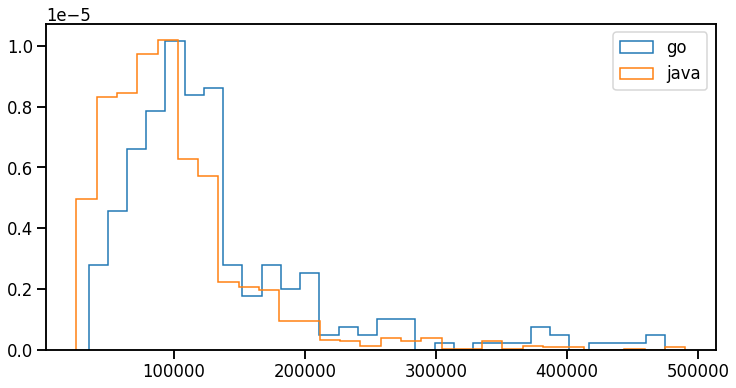

In [ ]:
#Comparamos uno de los lenguajes de media más alta (go) con uno de la media más baja (java), de los 6 lenguajes analizados
interesting_languages = ["go", "java"]

plt.figure(figsize=(12, 6))
for lang in interesting_languages:
  filtered_df_lang_3 = df_lang[df_lang.programming_language == lang]
  plt.hist(filtered_df_lang_3.salary_monthly_NETO, density = True, label = lang, bins = 30, histtype = 'step')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

Vemos que las distribuciones difieren entre sí; se ve que la distribución de go está más desplazada hacia la derecha y su cola derecha decae más lentamente.

Podríamos decir que les usuaries que trabajan con lenguajes go tienen, en media, un sueldo mayor a les que trabajan con java.

Cabe recordar que de todes les encuestades nos quedamos con una subpoblación cuyo sueldo pertenecía a un rango que elegimos nosotres. También debemos recordar que dividimos las filas que contenían más de un lenguaje en tantas filas como lenguajes. Lo que nos borra la posibilidad de estudiar el sueldo por cantidad de lenguajes y no sólo su tipo.


# 4°) Análisis de probabilidad



###Probabilidad condicional de ganar más que la media para cada lenguaje 

In [ ]:
df_lang.columns
df_lang.programming_language.value_counts()

javascript    2249
sql           1957
html          1658
python        1340
java          1331
              ... 
adabas           1
natural          1
rexx             1
regex            1
infobasic        1
Name: programming_language, Length: 191, dtype: int64

Probabilidad de tener salario mayor al promedio: html --> 0.303
Probabilidad de tener salario mayor al promedio: javascript --> 0.356
Probabilidad de tener salario mayor al promedio: python --> 0.442
Probabilidad de tener salario mayor al promedio: bash/shell --> 0.448
Probabilidad de tener salario mayor al promedio: c --> 0.398
Probabilidad de tener salario mayor al promedio: css --> 0.307
Probabilidad de tener salario mayor al promedio: java --> 0.434
Probabilidad de tener salario mayor al promedio: php --> 0.336
Probabilidad de tener salario mayor al promedio: sql --> 0.333
Probabilidad de tener salario mayor al promedio: typescript --> 0.415
Probabilidad de tener salario mayor al promedio: c# --> 0.319
Probabilidad de tener salario mayor al promedio: .net --> 0.332
Probabilidad de tener salario mayor al promedio: vba --> 0.225
Probabilidad de tener salario mayor al promedio: c++ --> 0.361
Probabilidad de tener salario mayor al promedio: go --> 0.662



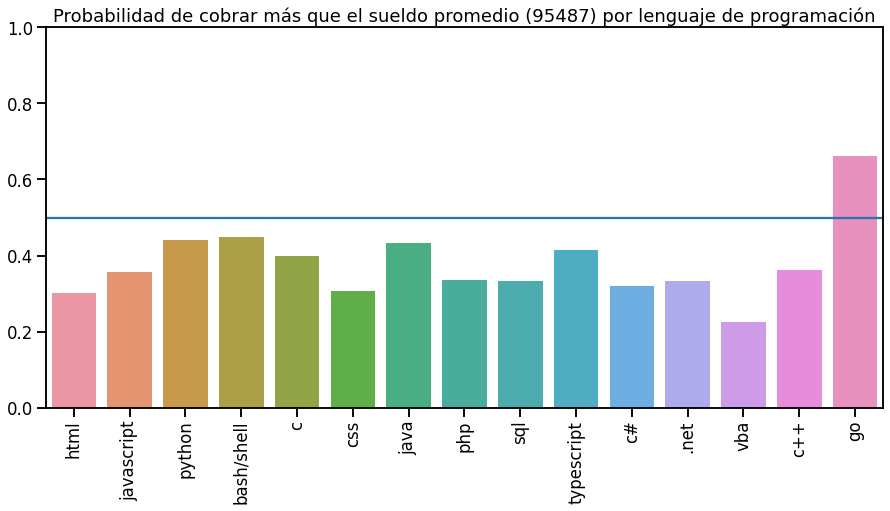

In [ ]:
d = filtered_df_lang #df con los 15 lenguajes con más de 200 entradas
# Groupby index para realizar el promedio real y no duplicar salarios,
# calculando el promedio de salario por persona (recordemos que al
# principio de este colab separamos las entradas que tenian más de un lenguaje
# de programación por persona)
avg = (d.groupby(d.index)["salary_monthly_NETO"].mean()).mean()

categ_list = []
probabilities = []

for language in d.programming_language.unique():
     s = d[d.programming_language == language].salary_monthly_NETO
     above_avg_mask = (s >= avg)
     len_study = s.shape[0]

     prob = np.round(above_avg_mask.sum()/len_study,3)
    
     categ_list.append(language)
     probabilities.append(prob)
    

     print(f"Probabilidad de tener salario mayor al promedio: {language} --> {prob}")
print("")
categ_prob = dict(zip(categ_list, probabilities))

plt.figure(figsize = [15,7])
seaborn.barplot(x = categ_list, y = probabilities)
plt.title(f"Probabilidad de cobrar más que el sueldo promedio ({int(avg)}) por lenguaje de programación")
plt.xticks(rotation = 90)
plt.axhline(0.5)
plt.ylim([0,1])
plt.show()

Aquí vemos que el 67% de les usuaries de *go* cobra por encima del promedio de los sueldos neto.

También observamos que este es el único lenguaje donde más del 50% de les programadores cobra más que el promedio.

Aclaración: 
Calculamos el promedio sobre los lenguajes ya seleccionados (15 lenguajes con más encuestas) usando promedio por persona y no por lenguaje.

In [ ]:
print('El salario medio de toda la muestra filtrada es', round(filtered_df_lang[salary_col].mean(),2))
print('El salario promedio por persona de toda la muestra filtrada es',round(avg,2))

El salario medio de toda la muestra filtrada es 97300.46
El salario promedio por persona de toda la muestra filtrada es 95487.07


###Probabilidad condicional de ganar más de 100k dado que se programa en python o java


In [ ]:
#A: ganar mas de 100k
#B: programar en python
#C: programar en python y java

#marginal:
#número de personas que usan python P(B)*(numero total de encuestades)
#python_si = df_lang['programming_language']=='python'
#print(sum(python_si))
#número de personas que usan python o java P(C)*(numero total de encuestades)
pythonyjava_si = df_lang['programming_language'].isin(['python','java'])
print(sum(pythonyjava_si))

2671


In [ ]:
#conjunta:
#numero de personas que usan python Y ganan mas de 100k P(A,B)*(numero total de encuestades): 
#python_mas100 = (df_lang['programming_language']=='python') & (df_lang['salary_monthly_NETO'] > 100000)
#numero de personas que usan python o java Y ganan mas de 100k P(A,C)*(numero total de encuestades):
pythonyjava_mas100 = (df_lang['programming_language'].isin(['python','java'])) & (df_lang['salary_monthly_NETO'] > 100000)
#print(sum(python_mas100))
print(sum(pythonyjava_mas100))


1000


In [ ]:
#condicional:
#P(A|B) = P(A,B)/P(B)
#print(sum(python_mas100)/sum(python_si))
#P(A|C) = P(A,C)/P(C)
print(sum(pythonyjava_mas100)/sum(pythonyjava_si))

0.3743916136278547


In [ ]:
#es independiente ganar mas de 100k, P(A), con P(A|B)?
#es independiente ganar mas de 100k, P(A), con P(A|C)?
#P(A)
sum(df_lang['salary_monthly_NETO']>100000)/len(df_lang)


0.3228993023399395

Como vemos, la probabilidad de ganar mas de 100k dado que programa en python o java es del 37%. Además vemos que esta probabilidad es diferente a la probabilidad de ganar más de 100k, que es 32%, por lo que podemos concluir que ganar más de 100k y programar en python o java NO son eventos independientes.

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Las variables numéricas elegidas son:
*   Años de trabajo en la compañía
*   Salario Neto
*   Edad

Las variables categóricas elegidas son:
*   Género
*   Provincia

In [ ]:
sub_df = df[['profile_gender', 'work_province', 'work_years_in_company', 'salary_monthly_NETO', 'profile_age']]

In [ ]:
sub_df[:3]

,profile_gender,work_province,work_years_in_company,salary_monthly_NETO,profile_age
0,Mujer,Ciudad Autónoma de Buenos Aires,3.0,43000.0,26
1,Hombre,Corrientes,2.0,63000.0,29
2,Mujer,Ciudad Autónoma de Buenos Aires,0.0,127000.0,22


In [ ]:
sub_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

En el siguiente gráfico podemos observar la distribución de les encuestades respecto a su edad.

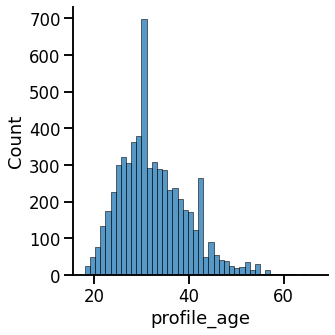

In [ ]:
seaborn.displot(sub_df[sub_df.profile_age < 100].profile_age)

Aquí concluimos que la mayoría aproximadamente tiene alrededor de 30 años.

Otra visualización que podemos realizar, es aquella que no solo muestra las frecuencias por edad, sino también realiza una discriminación por género.

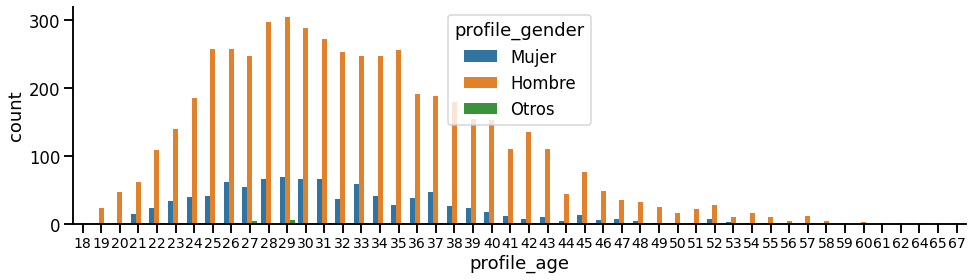

In [ ]:
fig = plt.figure(figsize=(16,4))
#age_counts = sub_df.groupby([profile_gender,profile_age]).profile_age.count().reset_index()
#sub_df[sub_df.profile_age < 100].profile_age.value_counts()
seaborn.countplot(data=sub_df[sub_df["profile_age"] <= 70], x='profile_age', hue='profile_gender')
plt.xticks(fontsize=14)
seaborn.despine()

Aquí vemos como claramente en todas las edades, el número de hombres encuestados supera ampliamente a los demás géneros.

**Estudio del Salario 'salary_monthly_NETO' teniendo en cuenta a las provincias donde trabajan les programadores.**

Procedemos a graficar y analizar el salario mensual neto de les programadres en base a la provincia donde ejercen su profesión. Se realizará un grafico de barras cuyo eje de abscisas esta representado por el atributo "work_province" y en eje de ordenadas el salario mensual neto promedio por cada provincia. Y se agrega como referencia, en una linea transversal, el salario neto promedio de toda la población.

Aclaración: Se toman como provincias a la Ciudad Autónoma de Buenos Aires y GBA (Gran Buenos Aires o tambien conocido como Conurbano Bonaerense). 

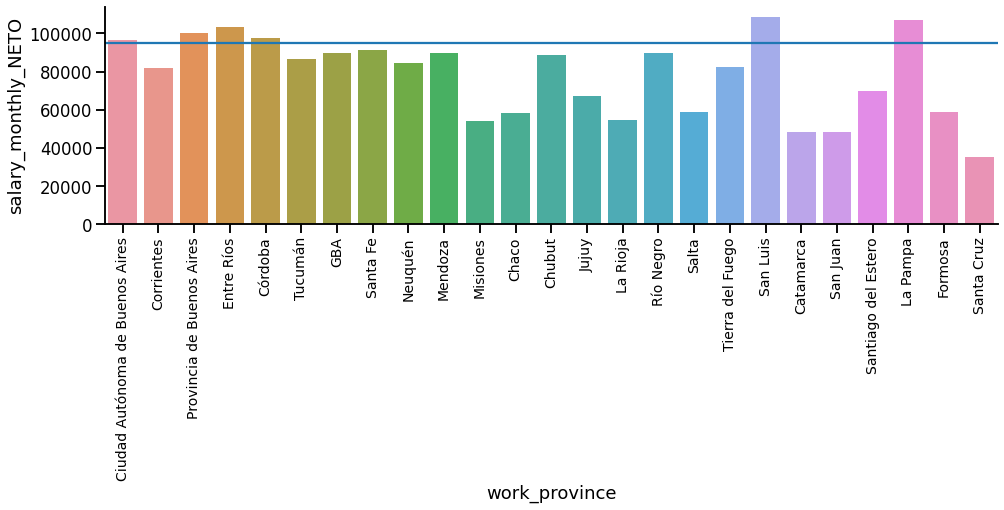

In [ ]:
from numpy import mean

fig = plt.figure(figsize=(16,4))

seaborn.barplot(data=sub_df, y='salary_monthly_NETO', x='work_province',estimator=mean, ci = 0)
mean=sub_df["salary_monthly_NETO"].mean()
plt.axhline(mean)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
seaborn.despine()

Conclusiones:


*   En sólo 6 provincias de las 25 listadas les programadores perciben un salario NETO promedio  por encima del salario Neto promedio de la población ($94.907,95). Estas provincias son : Ciudad Autónoma de Buenos Aires, Provincia de Buenos Aires, Entre Ríos, Córdoba, San Luis y La Pampa. 

*   Existe una brecha de aproximadamente $35000 (o superior) entre el salario medio poblacional y el salario promedio de las siguientes provincias: Misiones, Chaco, La Rioja, Salta, Catamarca, San Juan, Formosa y Santa Cruz.



**Estudio del Salario 'salary_monthly_NETO' teniendo en cuenta los años de trabajo en una compañía.**

Realizamos un gráfico de *scatterplot* donde analizamos una posible correlación entre los salarios mensuales netos de les programadores y los años de trabajo en una misma compañia. Además diferenciamos por género.

In [ ]:
sub_df['work_years_in_company'].describe()

count    6095.000000
mean        3.311944
std         4.367742
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        43.000000
Name: work_years_in_company, dtype: float64

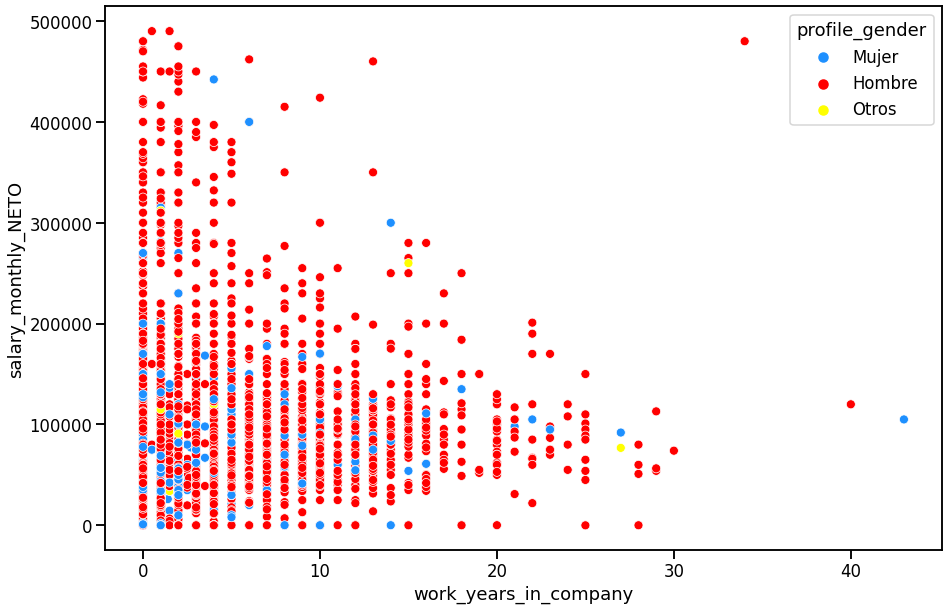

In [ ]:
fig = plt.figure(figsize = (15,10))
seaborn.scatterplot(data = sub_df, x = 'work_years_in_company', y=sub_df[sub_df.salary_monthly_NETO < 500000].salary_monthly_NETO, hue = 'profile_gender', palette = ['dodgerblue', 'red', 'yellow'])

Este gráfico de scatterplot nos da una pauta de que más años de trabajo en una misma compañía no implica, a priori, un mayor salario. Además observamos, independientemente de la antigüedad en la compañía, que por encima de un sueldo de $250000 la mayoria de les programadores son hombres.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



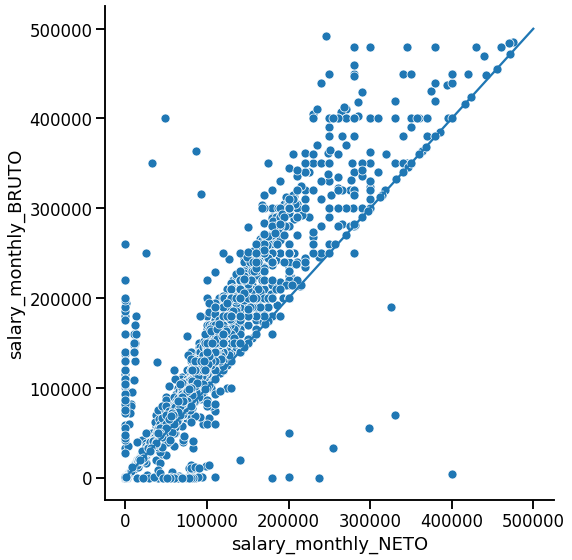

In [ ]:
min_sn = 25000
max_sn = 500000
#seaborn.pairplot(data=df[(min_sn < df.salary_monthly_NETO) & (df.salary_monthly_NETO < max_sn)], y_vars=['salary_monthly_BRUTO'],

seaborn.pairplot(data=df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1, height=8)
#seaborn.regplot(data=df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)], y='salary_monthly_BRUTO',
 #                x='salary_monthly_NETO')
seaborn.lineplot(y = np.arange(0,max_sn, (max_sn-0) / len(df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)])), 
                                  x =  np.arange(0,max_sn, (max_sn-0) / len(df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)]))) 

Las lineas verticales indican personas que contestaron su salario bruto y casi nada o nada del neto. La linea horizontal indica el caso contrario; personas que indicaron su salario neto pero nada del bruto.
Se ven muchas personas que indicaron un salario bruto igual al neto (linea a 45 grados), o personas que comentaron que su sueldo bruto es menor que su sueldo neto (datos por debajo de la línea de 45°).

Estos casos indicarían personas que llenaron mal el formulario. Sin embargo, hay una porción importante de datos rellenados de forma correcta.

En este sentido consideramos mejor no tirar ninguna de las dos columnas.


In [ ]:
#Calculo de correlacion
df.corr()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
profile_age,1.000000,0.009316,0.022181,0.027657,0.001154,-0.000541,-0.006752,-0.003909,0.005452,0.007943,0.013962,0.018650,0.002991,0.001167
profile_years_experience,0.009316,1.000000,0.512288,0.485628,0.096228,0.045961,0.250545,0.234471,-0.002998,-0.050249,-0.026175,-0.025907,-0.064246,-0.027675
work_years_in_company,0.022181,0.512288,1.000000,0.579205,0.116935,0.054418,0.019175,0.018223,-0.120715,-0.179082,-0.030476,-0.018353,-0.178880,-0.137251
work_years_in_current_position,0.027657,0.485628,0.579205,1.000000,0.029379,0.016424,0.039366,0.045107,-0.085018,-0.124151,-0.023831,-0.026088,-0.142257,-0.099066
work_people_in_charge_of,0.001154,0.096228,0.116935,0.029379,1.000000,0.003338,0.101176,0.077913,0.026433,0.024346,0.015548,0.023246,-0.000400,-0.009451
salary_on_call_duty_charge,-0.000541,0.045961,0.054418,0.016424,0.003338,1.000000,0.149794,0.169135,-0.000021,0.002596,0.007800,0.011848,-0.000033,-0.020966
salary_monthly_BRUTO,-0.006752,0.250545,0.019175,0.039366,0.101176,0.149794,1.000000,0.833335,0.344676,0.331435,0.010695,-0.009646,0.196381,0.115718
salary_monthly_NETO,-0.003909,0.234471,0.018223,0.045107,0.077913,0.169135,0.833335,1.000000,0.339314,0.324840,-0.018899,-0.043154,0.192391,0.095460
salary_satisfaction,0.005452,-0.002998,-0.120715,-0.085018,0.026433,-0.000021,0.344676,0.339314,1.000000,0.726729,0.135787,0.132682,0.511647,0.226400
salary_comparison_last_semester,0.007943,-0.050249,-0.179082,-0.124151,0.024346,0.002596,0.331435,0.324840,0.726729,1.000000,0.210132,0.180426,0.464407,0.206204


El coeficiente de correlación entre el Salario Neto y Bruto es 0,83

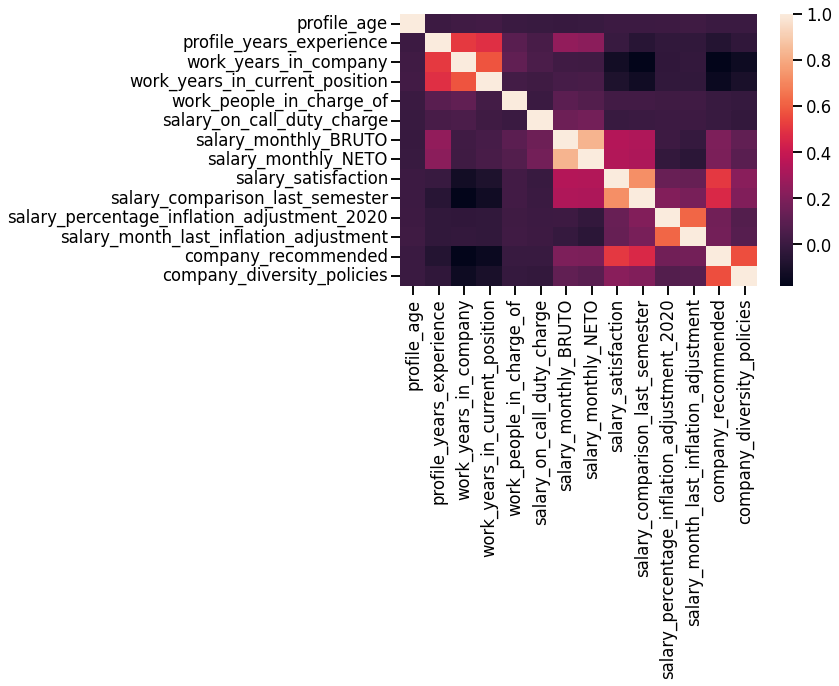

In [ ]:
fig = plt.figure(figsize=(8,5))
seaborn.heatmap(data=df.corr())


Ambas variables poseen una alta correlación, y por lo mencionado anteriormente consideramos que es mejor conservar ambas columnas.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
sub_df2 = df[['profile_studies_level', 'salary_monthly_NETO']]

Para poder seleccionar las subpoblaciones a estudiar, realizamos un conteo del número de programadores según el nivel de estudios alcanzado. Podemos observar que los niveles que predominan son universitario y terciario.

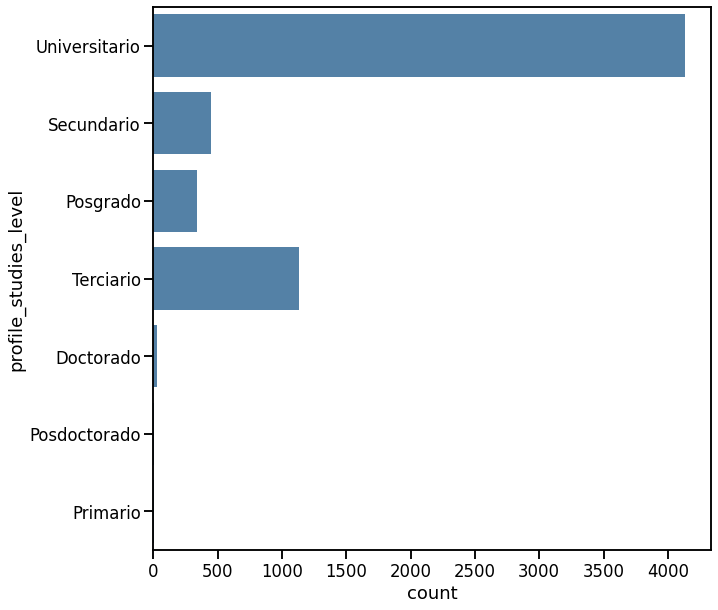

In [ ]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=sub_df2.profile_studies_level, color='steelblue')

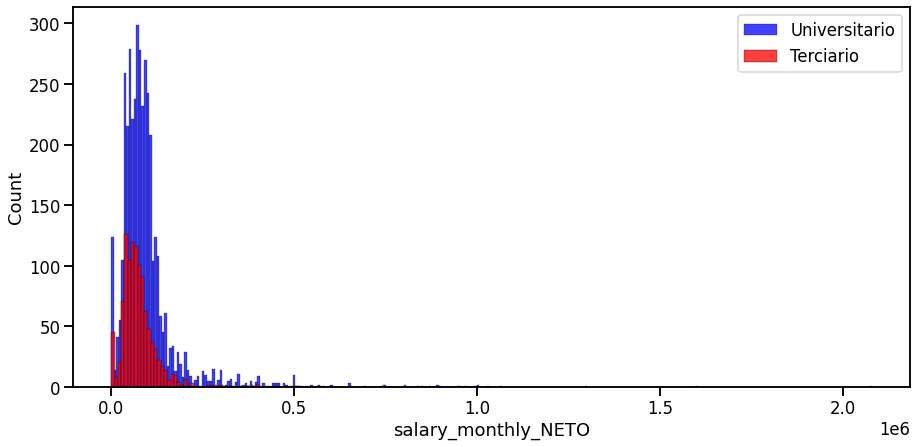

In [ ]:
# Utilizamos el mismo gráfico del item a), pero comparando las distribuciones de salario de los niveles terciario y universitario.
plt.figure(figsize=[15,7])
seaborn.histplot(sub_df2[sub_df2["profile_studies_level"] == "Universitario"]["salary_monthly_NETO"], label = "Universitario", color = "b")
seaborn.histplot(sub_df2[sub_df2["profile_studies_level"] == "Terciario"]["salary_monthly_NETO"],  label = "Terciario", color = "r")
plt.legend()
plt.show()

Para poder determinar si el salario neto y el nivel de estudio son variables independientes, vamos a tomar en consideración las siguientes probabilidades:
* P(A) = Probabilidad que les encuestades tengan un ingreso neto que esté comprendido entre el primer y el tercer cuartil.
* P(B) = Probabilidad de que les encuestades tengan como máximo nivel de estudios alcanzado 'universitario' o 'terciario', teniendo en cuenta que estos niveles son predominante en la encuesta.

In [ ]:
Q1,Q3 = np.nanquantile(sub_df['salary_monthly_NETO'].values, [0.25, 0.75])

In [ ]:
#P(A)
#Probabilidad de que los sueldos netos se encuentren entre el primer y el tercer cuartil, tomando como referencia la población total de estudio.
prob_Q1_Q3 = len(sub_df2[(Q1 <= sub_df2['salary_monthly_NETO']) & (sub_df2['salary_monthly_NETO']<=Q3)]) / len(sub_df2) ###ACA ERROR
prob_Q1_Q3

0.4856439704675964

Notamos aquí que para P(A) esperamos una probabilidad del 50% y obtuvimos una del 48%. Esto se debe a un error muestral y usaremos este valor del 2% como criterio de error en el momento de determinar diferencias significativas entre probabilidades.

In [ ]:
#subpoblación A
is_above_Q1 = (sub_df2['salary_monthly_NETO'] >= Q1) & (sub_df2['salary_monthly_NETO'] <= Q3)
#Subpoblación B
level_studies = sub_df2['profile_studies_level'].isin(['Terciario', 'Universitario'])

In [ ]:
#P(A,B)*Número total de encuestades 
intersection_count = len(sub_df2[is_above_Q1 & level_studies])
sub_df2[is_above_Q1 & level_studies]


,profile_studies_level,salary_monthly_NETO
1,Universitario,63000.0
4,Universitario,106000.0
6,Universitario,62400.0
8,Universitario,75000.0
11,Universitario,94621.0
...,...,...
6085,Terciario,53784.0
6086,Universitario,82000.0
6090,Terciario,97000.0
6091,Universitario,71000.0


In [ ]:
#P(A|B) = P(A,B)/P(B)
p_cond = len(df[is_above_Q1 & level_studies]) / len(df[level_studies])
p_cond

0.4935459377372817

Podemos concluir que en la subpoblación elegida, la probabilidad condicional de que les programadores cobren entre el primer y el tercer cuartil, dado que su máximo nivel de estudio es 'terciario' o 'universitario' es de aproximadamente 0,50. Por otro lado, la probabilidad de que une programadore tenga un sueldo neto entre el primer y tercer cuartil es también aproximadamente de 0,50, por lo que no podemos concluir de este análisis dependencia ni tampoco confirmar independencia entre ambos eventos (P(A) vs P(A|B)).


Por otro lado, vemos que tomando como poblacion a les universitaries y les terciaries, estamos analizando más del 85% de la población total a la vez. Esto lleva a que es muy probable de que las medidas de tendencia central den similares, y por lo tanto, no podamos afirmar independencia de eventos.

Por todo lo mencionado, tomaremos una nueva subpoblación para hacer este estudio.

In [ ]:
len(df[level_studies])/len(df)

0.8643150123051682

In [ ]:
#Probaremos sumando las poblaciones pequeñas de doctorado y posgrado
# (la de posdoctorado la dejamos afuera por considerar su dato outlier)
len(df[df['profile_studies_level'].isin(['Doctorado', 'Posgrado'])])/len(df)

0.06103363412633306

In [ ]:
#Población de los que tienen terciario:
len(df[df['profile_studies_level'].isin(['Terciario'])])/len(df)

0.18621821164889255

In [ ]:
#Población de los que tienen universitario:
len(df[df['profile_studies_level'].isin(['Universitario'])])/len(df)

0.6780968006562756

**Subpoblación a estudiar: Estudios universitarios completos versus estudios terciarios completos** 

En primer lugar, agregamos una nueva columna denominada "studies" con el objetivo de observar no sólo el nivel de estudios de les programadores ("profile_studies_level") sino también el estado en que encuentran actualmente dichos estudios (completo, en curso o incompleto) dado por la columna "profile_studies_level_state".

In [ ]:
df['studies'] = df['profile_studies_level'].str.cat(df['profile_studies_level_state'], sep = ' ').str.lower()

In [ ]:
df = df.drop(df[df.studies == 'ninguno'].index)
studies_count = df.studies.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'level_studies', 'studies': 'frequency'})
studies_count[:40]

,level_studies,frequency
0,universitario completado,1616
1,universitario en curso,1342
2,universitario incompleto,1175
3,terciario completado,663
4,secundario completado,386
5,terciario incompleto,239
6,terciario en curso,233
7,posgrado completado,226
8,posgrado en curso,82
9,secundario incompleto,52


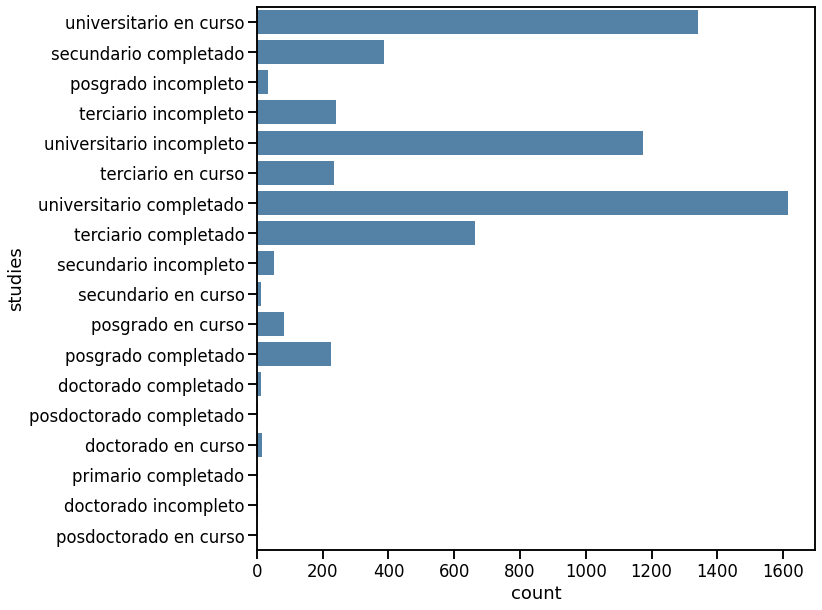

In [ ]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.studies, color='steelblue')

Se puede observar que la mayoria de les encuestades son Universitarios con sus estudios culminados o completos (1616 programadores) y en menor medida Universitarios en curso (1342 personas) y con sus estudios incompletos (1175 personas). Además, dentro del grupo de nivel de estudios completos les siguen  aquellos encuestados que están en el nivel terciario (663 progamadores).

**Universitario Completo VS Terciario Completo**

Estudiaremos las siguientes subpoblaciones:

1.   Subpoblación A: Programadores que tienen sus estudios universitarios completos.
2.   Subpoblación B: Programadores que tienen sus estudios Terciarios completos.




**Histogramas de la variable 'salary_monthly_NETO' comparando las subpoblaciones A y B**


(0.0, 1000000.0)

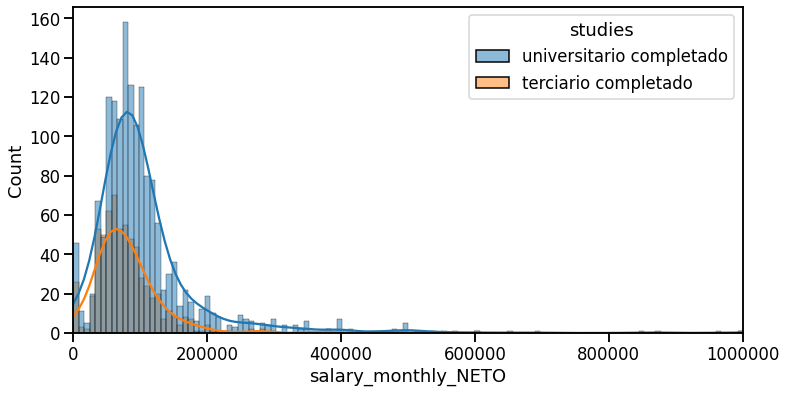

In [ ]:

levels_studies = ['Universitario', 'Terciario'] 
filtered_df_studies = df[df.profile_studies_level.isin(levels_studies)& df.profile_studies_level_state.isin(["Completado"])]
#distribuciones:
plt.figure(figsize=(12, 6))
seaborn.histplot(data=filtered_df_studies, x='salary_monthly_NETO', hue='studies', kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,1000000])

Se puede ver que ambas poblaciones siguen una  distribución Normal. Les programadores Universitaries con estudios completos perciben un salario mensual neto mayor que les programadores con terciarios completos. 

**Medidas de centralización para cada subpoblación:**


In [ ]:

is_univ =  df.profile_studies_level.isin(["Universitario"])& df.profile_studies_level_state.isin(["Completado"])
univ = df[is_univ].salary_monthly_NETO
univ_mean = univ.mean()
print("media salario mensual neto universitarios completos: ", round(univ_mean,2))

is_terc = df.profile_studies_level.isin(["Terciario"])& df.profile_studies_level_state.isin(["Completado"])
terc = df[is_terc].salary_monthly_NETO
terc_mean = terc.mean()
print("media salario mensual neto Terciarios completos: ", round(terc_mean,2))




media salario mensual neto universitarios completos:  107444.6
media salario mensual neto Terciarios completos:  83642.76


**Medidas de disperción para cada subpoblación:**

In [ ]:
univ_var = univ.var()
univ_std = univ.std()

print("Varianza subpoblacion universitaria: ", round(univ_var,2))
print("Desvio standard subpoblacion universitaria: ", round(univ_std,2))


print("")

terc_var = terc.var()
terc_std = terc.std()

print("Varianza subpoblacion terciaria: ", round(terc_var,2))
print("Desvio standard subpoblacion terciaria: ", round(terc_std,2))


Varianza subpoblacion universitaria:  9194666459.22
Desvio standard subpoblacion universitaria:  95888.82

Varianza subpoblacion terciaria:  4885056257.7
Desvio standard subpoblacion terciaria:  69893.18


Para determinar si estas variables son independientes entre sí, decidimos calcular la probabilidad condicional. Es decir, cual es la probabilidad de ganar sueldos por encima del promedio de la población teniendo cierto nivel de estudios completos.



*   A: Programadores que tienen sus estudios Universitarios completos. 
*   B: Programadores que tienen sus estudios Terciarios completos.
*   C: Programadores que ganan por encima de la media poblacional.
*   P(A): Probabalidad de que les programadores tengan sus estudios Universitarios completos.
*   P(B):  Probabalidad de que les programadores tengan sus estudios  Terciarios completos.
*   P(C):  Probabalidad de que les programadores  ganen por encima de la media poblacional.
*  P(C|A): Probabilidad de que les programadores ganen por encima del promedio de toda la población encuestada, dado que sean Universitarios con sus estudios culminados.
*  P(C|B): Probabilidad de que les programadores ganen por encima del promedio de toda la población encuestada, dado que sean Terciarios con sus estudios culminados.




In [ ]:
#P(C): Probabalidad de que les programadores ganen por encima de la media poblacional.
C=df['salary_monthly_NETO'] > df.salary_monthly_NETO.mean()
P_C= len(df[C])/(len(df))
print("P(C): ", round(P_C,2))
print("Salario mensual neto promedio: ",round(df.salary_monthly_NETO.mean(),2))

P(C):  0.33
Salario mensual neto promedio:  94907.95


In [ ]:
# P(A): Probabalidad de que les programadores tengan sus estudios Universitarios completos.
A=df.profile_studies_level.isin(["Universitario"])& df.profile_studies_level_state.isin(["Completado"])
P_A= len(df[A])/(len(df))
print("P(A): ",round(P_A,2))

P(A):  0.27


In [ ]:
# P(C|A): Probabilidad de que les programadores ganen por encima del promedio de toda la población encuestada,
# dado que sean Universitarios con sus estudios culminados.
P_cond_univ= len(df[C&A])/(len(df[A])) 
print("P(C|A): ", round(P_cond_univ,2)) 

P(C|A):  0.43


In [ ]:
# P(B): Probabalidad de que les programadores tengan sus estudios Terciarios completos.
B=df.profile_studies_level.isin(["Terciario"])& df.profile_studies_level_state.isin(["Completado"])
P_B= len(df[B])/(len(df))
print("P(B): ", round(P_B,2))

P(B):  0.11


In [ ]:
# P(C|B): Probabilidad de que les programadores ganen por encima del promedio de toda la población encuestada,
# dado que sean Terciarios con sus estudios culminados.
P_cond_terc= len(df[C&B])/(len(df[B])) 
print("P(C|B): ", round(P_cond_terc,2)) 

P(C|B):  0.27


De acuerdo a los resultados, observamos que la probabilidad de tener un sueldo por encima de la media teniendo estudios universitarios completos son altas (43%), con sueldo promedio de 107444  pesos aproximadamente y las probabilidades de tenerlo teniendo estudios  terciarios completos son más bajas (27%), con sueldos promedios de alrededor de 83642 pesos. 

Teniendo en cuenta que la probabilidad de tener un sueldo superior a la media de la población (aproximadamente 95000 pesos) como programador es del 33%, podemos decir que Universitario y Terciario completos y Nivel de estudio no son variables independientes, ya que difieren en un 10% y 6%, respectivamente. 

También podemos concluir que Universitario y Terciario completos y Nivel de estudio no son variables independientes al observar que las probabilidades condicionales de estos difieren en 16% entre sí.

Luego concluimos que, al ser Universitarios y Terciarios una población grande para sacar conclusiones estadísticas, Salario neto no es independiente con Nivel de estudio. 

Aclaración: Tomamos un 6% de diferencia como una diferencia estadísticamente significativa teniendo en cuenta que una aproximación de nuestro error muestral está alrededor de 2%, como lo vimos anteriormente.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Las variables numéricas elegidas son 'Años en la compañía' y 'Años de experiencia'. La variable categórica es 'Género'.

In [ ]:
sub_df3 = df[['profile_gender', 'work_years_in_company', 'profile_years_experience']]

(0.0, 60.0)

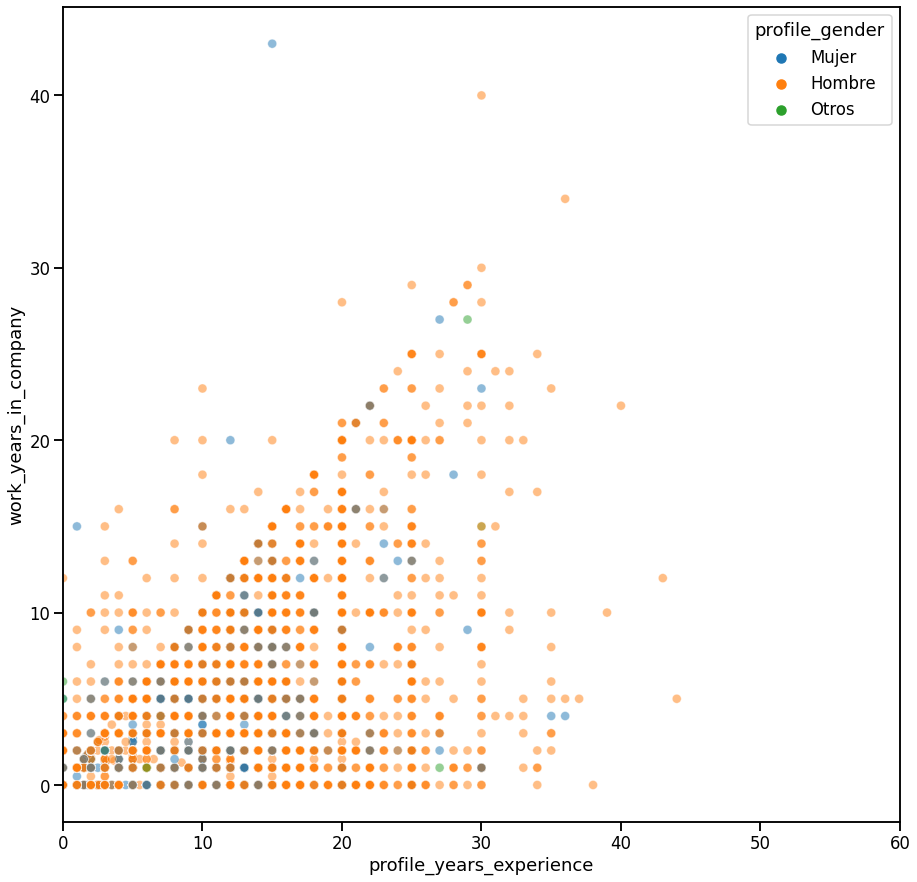

In [ ]:
plt.figure(figsize = [15,15])
seaborn.scatterplot(data=sub_df3, x="profile_years_experience", y="work_years_in_company", hue="profile_gender", alpha = 0.5) 
plt.xlim([0,60])

Podemos concluir tres ideas observando el gráfico:


*   En primer lugar, se puede ver una cierta y esperable correlación entre los años de experiencia y los años de trabajo en la empresa actual.
*   En segundo lugar, podemos observar que los datos que se encuentran por encima de la línea de 45°, corresponden a datos mal cargados.
*   En tercer lugar, no podemos observar una segmentación clara respecto al género.





